# **Importing dataset from google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing python libraries**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model


# **Spliting the dataset into train, validation and test sets**

In [ ]:
data_dir='/content/drive/MyDrive/Project_PPL'
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Project_PPL/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
# Validation Data Generator
valid_datagen = ImageDataGenerator(rescale=1.0/255)

valid_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/Project_PPL/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Test Data Generator
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Project_PPL/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)




Found 35686 images belonging to 37 classes.
Found 4447 images belonging to 37 classes.
Found 4498 images belonging to 37 classes.


In [ ]:
class_labels=train_generator.class_indices

{'.ipynb_checkpoints': 0,
 'Apple___Apple_scab': 1,
 'Apple___Black_rot': 2,
 'Apple___healthy': 3,
 'Corn_Blight': 4,
 'Corn_Common_Rust': 5,
 'Corn_Gray_Leaf_Spot': 6,
 'Corn_Healthy': 7,
 'Cotton_Healthy': 8,
 'Cotton_bacterial_blight': 9,
 'Cotton_curl_virus': 10,
 'Grape___Black_rot': 11,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 12,
 'Grape___healthy': 13,
 'Pepper,_bell___Bacterial_spot': 14,
 'Pepper,_bell___healthy': 15,
 'Potato___Early_blight': 16,
 'Potato___Late_blight': 17,
 'Potato___healthy': 18,
 'Rice_Healthy': 19,
 'Rice_bacterial_leaf_blight': 20,
 'Rice_brown_spot': 21,
 'Rice_leaf_blast': 22,
 'Sugarcan_Mosaic': 23,
 'Sugarcane_Healthy': 24,
 'Sugarcane_RedRot': 25,
 'Sugarcane_Rust': 26,
 'Sugarcane_Yellow': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Tomato___Late_blight': 30,
 'Tomato___Septoria_leaf_spot': 31,
 'Tomato___healthy': 32,
 'Wheat_Brown_rust': 33,
 'Wheat_Healthy': 34,
 'Wheat_Loose_Smut': 35,
 'Wheat_Yellow_rust': 36}

In [ ]:
!ls '/content/drive/MyDrive/Project_PPL'

 Apple___Apple_scab			       Rice_bacterial_leaf_blight
 Apple___Black_rot			       Rice_brown_spot
 Apple___healthy			       Rice_Healthy
 Corn_Blight				       Rice_leaf_blast
 Corn_Common_Rust			       Sugarcane_Healthy
 Corn_Gray_Leaf_Spot			       Sugarcane_RedRot
 Corn_Healthy				       Sugarcane_Rust
 Cotton_bacterial_blight		       Sugarcane_Yellow
 Cotton_curl_virus			       Sugarcan_Mosaic
 Cotton_Healthy				       Tomato___Bacterial_spot
 Grape___Black_rot			       Tomato___Early_blight
 Grape___healthy			       Tomato___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'   Tomato___Late_blight
 Pepper,_bell___Bacterial_spot		       Tomato___Septoria_leaf_spot
 Pepper,_bell___healthy			       Wheat_Brown_rust
 Potato___Early_blight			       Wheat_Healthy
 Potato___healthy			       Wheat_Loose_Smut
 Potato___Late_blight			       Wheat_Yellow_rust


# **Building layers for CNN model**

In [ ]:

model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=[224, 224, 3]),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  # Added 'same' padding
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Added 'same' padding
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  # Added 'same' padding
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),  # You might consider removing some pooling layers if needed
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1500, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(37, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 2, 2, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 1, 1, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 1, 1, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │         769,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,535,760 (21.12 MB)

 Trainable params: 5,535,760 (21.12 MB)

 Non-trainable params: 0 (0.00 B)

# **Training the CNN model**

In [ ]:
model1.compile(
    optimizer=Adam(learning_rate=0.001),
    #optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
y1=model1.fit(
    train_generator,
    batch_size=64,
    epochs=15,
    verbose=1,
    validation_data=valid_generator,

)

Epoch 1/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 1673s 3s/step - accuracy: 0.4769 - loss: 1.5452 - val_accuracy: 0.5851 - val_loss: 1.3982
Epoch 2/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 1666s 3s/step - accuracy: 0.6597 - loss: 1.0614 - val_accuracy: 0.6915 - val_loss: 1.0350
Epoch 3/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 1723s 3s/step - accuracy: 0.7636 - loss: 0.7366 - val_accuracy: 0.7457 - val_loss: 0.8165
Epoch 4/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 1669s 3s/step - accuracy: 0.8115 - loss: 0.5838 - val_accuracy: 0.7511 - val_loss: 0.8205
Epoch 5/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 1691s 3s/step - accuracy: 0.8503 - loss: 0.4773 - val_accuracy: 0.7867 - val_loss: 0.7617
Epoch 6/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 1670s 3s/step - accuracy: 0.8903 - loss: 0.3539 - val_accuracy: 0.8001 - val_loss: 0.7531
Epoch 7/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 1720s 3s/step - accuracy: 0.8969 - loss: 0.3444 - val_accuracy: 0.8091 - val_loss: 0.6788
Epoch 8/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 1686s 3s/step - accuracy: 0.9116 - loss: 0.2954 - 

In [ ]:
scores=model1.evaluate(test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


140/140 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8454 - loss: 0.7933


In [ ]:
scores

[0.8375934362411499, 0.8174781203269958]

In [ ]:
y

In [ ]:
len(y.history['accuracy'])

In [ ]:
train_acc=y.history['accuracy']
val_acc=y.history['val_accuracy']

In [ ]:
train_loss=y.history['loss']
val_loss=y.history['val_loss']

ValueError: x and y must have same first dimension, but have shapes (20,) and (15,)

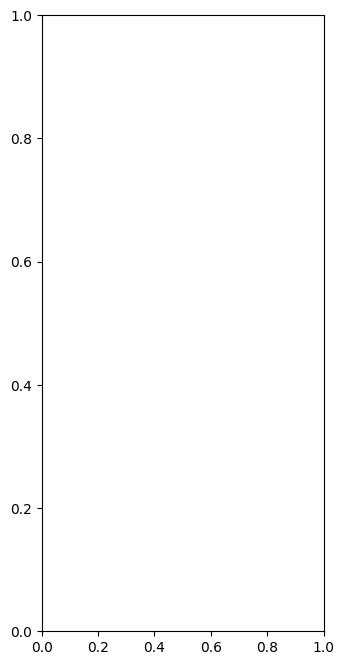

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(20),train_acc,label='TRAINING ACCURACY')
plt.plot(range(20),val_acc,label='VALIDATION ACCURACY')
plt.title('TRAINING AND VALIDATION ACCURACY PLOT')

# **Checking precision, accuracy, f1 and recall scores for CNN model**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_true,predicted_categories)

In [ ]:
y_true = []  # To store true labels
y_pred = []  # To store predicted labels


for images, labels in test_generator:
    predictions = model1.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)  # For categorical labels

    y_true.extend(true_classes)
    y_pred.extend(predicted_classes)

    if len(y_true) >= test_generator.samples:  # Stop after covering the test set
        break


precision = precision_score(y_true, y_pred, average='macro')
print(f"Precision (macro): {precision}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


KeyboardInterrupt: 

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8944419542805917


In [ ]:
recall = recall_score(y_true, y_pred, average='macro')
print(f"Recall (macro): {recall}")

Recall (macro): 0.8496831989632319


In [ ]:
f1 = f1_score(y_true, y_pred, average='macro')
print(f"F1-Score (macro): {f1}")

F1-Score (macro): 0.8456587986982544


In [ ]:
print(classification_report(y_true,y_pred,target_names=class_labels))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step
Image 1: Predicted - Apple___Apple_scab, Actual - Apple___Apple_scab
Image 2: Predicted - Apple___Apple_scab, Actual - Apple___Apple_scab
Image 3: Predicted - Apple___Apple_scab, Actual - Apple___Apple_scab
Image 4: Predicted - Apple___Apple_scab, Actual - Apple___Apple_scab
Image 5: Predicted - Apple___Apple_scab, Actual - Apple___Apple_scab
Image 6: Predicted - Apple___Apple_scab, Actual - Apple___Apple_scab
Image 7: Predicted - Apple___Apple_scab, Actual - Apple___Apple_scab
Image 8: Predicted - Apple___Apple_scab, Actual - Apple___Apple_scab
Image 9: Predicted - Apple___Apple_scab, Actual - Apple___Apple_scab
Image 10: Predicted - Apple___Apple_scab, Actual - Apple___Apple_scab
Image 11: Predicted - Apple___Apple_scab, Actual - Apple___Apple_scab
Image 12: Predicted - Apple___Apple_scab, Actual - Apple___Apple_scab
Image 13: Predicted - Grape___healthy, Actual - Apple___Apple_scab
Image 14: Predicted - Apple___Apple_scab, Actual - Apple___Appl

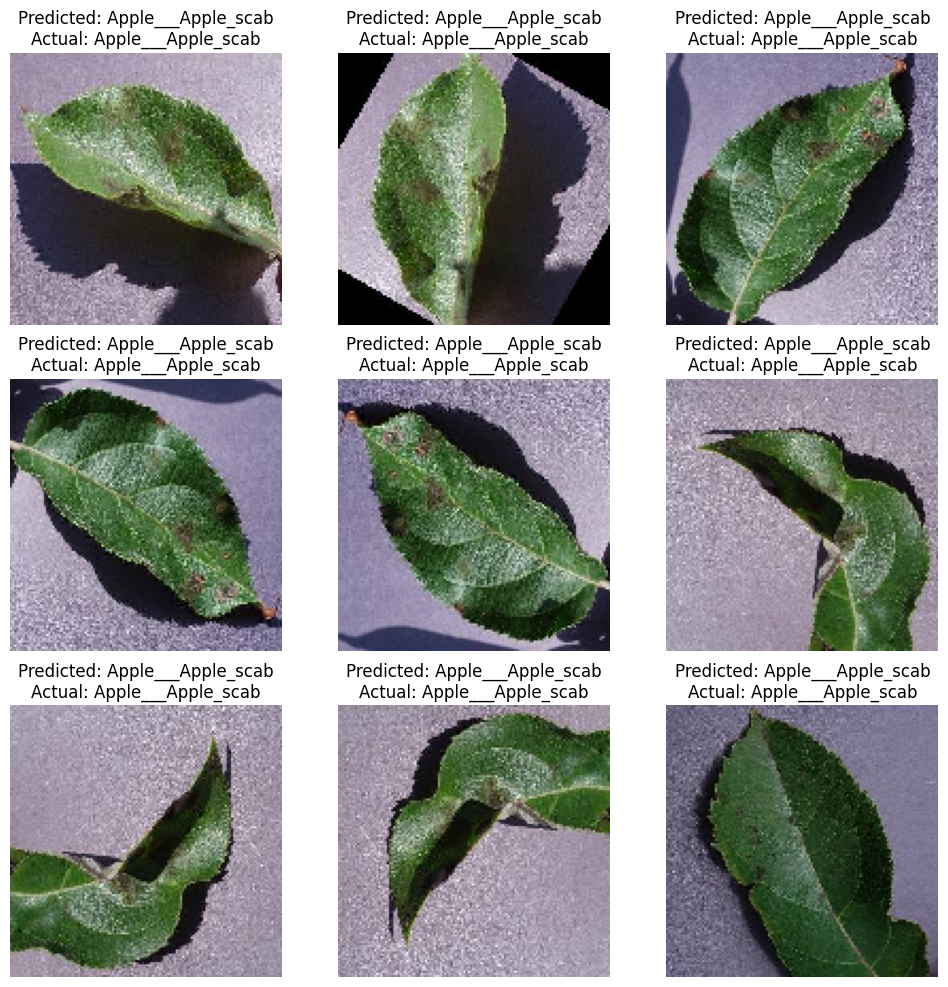

In [ ]:

test_images, test_labels = next(test_generator)  # Fetches one batch of images
 # Make predictions on the batch
predictions = model1.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)  # Get the class with the highest probability
true_classes = np.argmax(test_labels, axis=1)       # Convert one-hot labels to class indices
class_labels = list(test_generator.class_indices.keys())  # Class names

# Display predictions and actual labels for the batch
for i in range(len(test_images)):
    print(f"Image {i + 1}: Predicted - {class_labels[predicted_classes[i]]}, Actual - {class_labels[true_classes[i]]}")
import matplotlib.pyplot as plt

# Plot some of the images with predicted and actual labels
plt.figure(figsize=(12, 12))
for i in range(9):  # Display the first 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {class_labels[predicted_classes[i]]}\nActual: {class_labels[true_classes[i]]}")
    plt.axis('off')
plt.show()

# **Saving the model part1**

In [ ]:
model1.save('/content/drive/MyDrive/PPL_Project.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_1 = load_model('/content/drive/MyDrive/PPL_Project.h5')

# **Training the model using pre-trained model**

In [ ]:
pre_model=MobileNetV2(weights='imagenet',
            include_top=False,
            input_shape=(224, 224, 3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
pre_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
for layer in pre_model.layers:
    layer.trainable = False

In [ ]:
x=pre_model.output
x=Dense(512,activation='relu')(x)
x=Dropout(0.5)(x)
x=GlobalAveragePooling2D()(x)
x=Dense(256,activation='relu')(x)
x=Dropout(0.5)(x)
output_layer=Dense(37,activation='softmax')(x)

In [ ]:
model=Model(inputs=pre_model.input,outputs=output_layer)

In [ ]:
model_1=Model(inputs=pre_model.input, outputs=output_layer)

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,054,693 (11.65 MB)

 Trainable params: 796,709 (3.04 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Compiling the model
model_1.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
his=model.fit(
    train_generator,
    batch_size=64,
    epochs=10,
    verbose=1,
    validation_data=valid_generator

)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


KeyboardInterrupt: 

In [ ]:
his_1=model_1.fit(
    train_generator,
    batch_size=64,
    epochs=10,
    verbose=1,
    validation_data=valid_generator

)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 134/1116 ━━━━━━━━━━━━━━━━━━━━ 2:21:45 9s/step - accuracy: 0.2981 - loss: 2.6039

# **Precision,accuracy,f1 and recall after TL**

In [ ]:

y_true1 = []  # To store true labels
y_pred1 = []  # To store predicted labels

# Loop over your test data to gather true and predicted labels
for images, labels in test_generator:  # Assuming `test_generator` is your test data generator
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)  # For categorical labels

    y_true1.extend(true_classes)
    y_pred1.extend(predicted_classes)

    if len(y_true1) >= test_generator.samples:  # Stop after covering the test set
        break

# Compute precision
precision = precision_score(y_true1, y_pred1, average='macro')  # or 'weighted'
print(f"Precision (macro): {precision}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 33s 374ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 426ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 421ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 381ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 386ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 394ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 400ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 383ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 382ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 380ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 409ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 673ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 381ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 388ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
accuracy = accuracy_score(y_true1, y_pred1)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9445540116539668


In [ ]:
recall = recall_score(y_true1, y_pred1, average='macro')
print(f"Recall (macro): {recall}")

Recall (macro): 0.9203503148934065


In [ ]:
f1 = f1_score(y_true1, y_pred1, average='macro')
print(f"F1-Score (macro): {f1}")

F1-Score (macro): 0.9216032980772729


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_true1,y_pred1,target_names=class_labels))

                                            precision    recall  f1-score   support

                        Apple___Apple_scab       0.99      0.97      0.98      1008
                         Apple___Black_rot       0.99      0.99      0.99       993
                           Apple___healthy       0.94      1.00      0.97      1004
                               Corn_Blight       0.92      0.91      0.91       573
                          Corn_Common_Rust       0.95      1.00      0.97       653
                       Corn_Gray_Leaf_Spot       0.97      0.80      0.88       287
                              Corn_Healthy       1.00      0.98      0.99       581
                            Cotton_Healthy       0.98      0.97      0.98       212
                   Cotton_bacterial_blight       0.99      0.93      0.96       224
                         Cotton_curl_virus       0.95      0.97      0.96       208
                         Grape___Black_rot       0.98      1.00      0.99  

# **Saving the model part2**

In [ ]:
model.save('/content/drive/MyDrive/PPL_Project1.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_pt1 = load_model('/content/drive/MyDrive/PPL_Project1.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Predicted Class: Potato___Early_blight


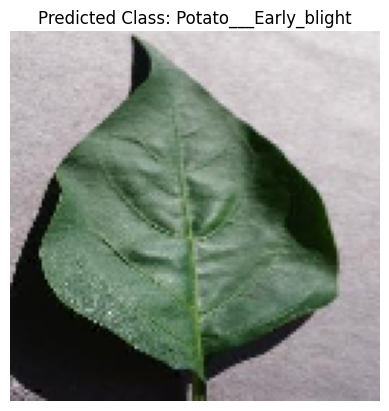

In [ ]:
from tensorflow.keras.preprocessing import image
class_labels = {
    0: 'Apple___Apple_scab',
    1: 'Apple___Black_rot',
    2: 'Apple___healthy',
    3: 'Corn_Blight',
    4: 'Corn_Common_Rust',
    5: 'Corn_Gray_Leaf_Spot',
    6: 'Corn_Healthy',
    7: 'Cotton_Healthy',
    8: 'Cotton_bacterial_blight',
    9: 'Cotton_curl_virus',
    10: 'Grape___Black_rot',
    11: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    12: 'Grape___healthy',
    13: 'Pepper,_bell___Bacterial_spot',
    14: 'Pepper,_bell___healthy',
    15: 'Potato___Early_blight',
    16: 'Potato___Late_blight',
    17: 'Potato___healthy',
    18: 'Rice_Healthy',
    19: 'Rice_bacterial_leaf_blight',
    20: 'Rice_brown_spot',
    21: 'Rice_leaf_blast',
    22: 'Sugarcan_Mosaic',
    23: 'Sugarcane_Healthy',
    24: 'Sugarcane_RedRot',
    25: 'Sugarcane_Rust',
    26: 'Sugarcane_Yellow',
    27: 'Tomato___Bacterial_spot',
    28: 'Tomato___Early_blight',
    29: 'Tomato___Late_blight',
    30: 'Tomato___Septoria_leaf_spot',
    31: 'Tomato___healthy',
    32: 'Wheat_Brown_rust',
    33: 'Wheat_Healthy',
    34: 'Wheat_Loose_Smut',
    35: 'Wheat_Yellow_rust'
}
# Load the image you want to predict
img_path = '/content/drive/MyDrive/Project_PPL/test/Pepper,_bell___healthy/08881481-53d5-412c-8d65-13c4edc6e3c1___JR_HL 8166.JPG'
img = image.load_img(img_path, target_size=(128, 128))  # Adjust size according to your model input

# Convert image to array
img_array = image.img_to_array(img)

# Reshape the image for the model (adding a batch dimension)
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image if necessary (e.g., divide by 255 if the model expects normalized images)
img_array = img_array / 255.0  # Adjust according to the preprocessing used during training

# Make the prediction
predictions = model_pt1.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]

# Display the result
print(f"Predicted Class: {predicted_class_label}")

# Optionally, display the image with predicted label
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_label}")
plt.axis('off')
plt.show()

first image to predict
actual label: Apple___Black_rot
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
predicted label: Apple___Black_rot
first image to predict
actual label: Apple___Black_rot
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 458ms/step
predicted label: Apple___Black_rot
first image to predict
actual label: Apple___Black_rot
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
predicted label: Apple___Black_rot
first image to predict
actual label: Apple___Black_rot
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step
predicted label: Apple___Black_rot
first image to predict
actual label: Apple___Black_rot
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 402ms/step
predicted label: Apple___Black_rot
first image to predict
actual label: Apple___Black_rot
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step
predicted label: Apple___Black_rot
first image to predict
actual label: Apple___Black_rot
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step
predicted label: Apple___Black_rot
first image to predict
actual label: Apple___Black_rot
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 373ms/step
pre

KeyboardInterrupt: 

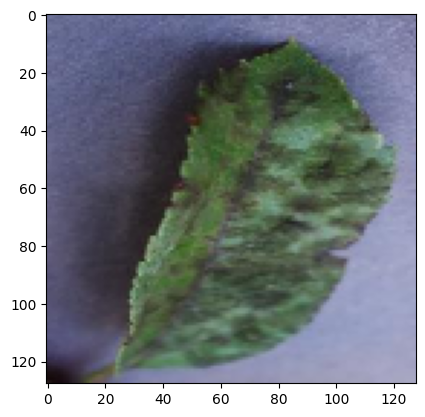

In [ ]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = np.argmax(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_labels[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_labels[np.argmax(batch_prediction[0])])

# **YOLO**

In [ ]:
#splitting the dataset into train and val folders suitable for yolo

import os
import shutil
import random

def split_dataset(input_folder, output_folder, train_ratio=0.8):
    """
    Split a dataset into training and validation sets.

    Parameters:
    - input_folder: str, path to the dataset folder (organized by category subfolders).
    - output_folder: str, path where the train/val folders will be created.
    - train_ratio: float, proportion of images to use for training.
    """
    # Paths for train and val folders
    train_folder = os.path.join(output_folder, 'train')
    val_folder = os.path.join(output_folder, 'val')

    # Create train and val directories
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(val_folder, exist_ok=True)

    # Loop through each class folder in the input dataset
    for category in os.listdir(input_folder):
        category_path = os.path.join(input_folder, category)

        if not os.path.isdir(category_path):
            continue

        # Make corresponding class folders in train and val directories
        train_category_path = os.path.join(train_folder, category)
        val_category_path = os.path.join(val_folder, category)
        os.makedirs(train_category_path, exist_ok=True)
        os.makedirs(val_category_path, exist_ok=True)

        # List all images in the category folder
        images = [img for img in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, img))]
        random.shuffle(images)

        # Split images into training and validation sets
        train_count = int(len(images) * train_ratio)
        train_images = images[:train_count]
        val_images = images[train_count:]

        # Copy images to the train and val folders
        for img_name in train_images:
            shutil.copy(os.path.join(category_path, img_name), os.path.join(train_category_path, img_name))
        for img_name in val_images:
            shutil.copy(os.path.join(category_path, img_name), os.path.join(val_category_path, img_name))

        print(f"Processed category '{category}': {len(train_images)} for training, {len(val_images)} for validation.")

    print("Dataset split complete.")

# Define paths and split ratio
input_folder = '/content/drive/MyDrive/Project_PPL'  # Replace with your actual input path
output_folder = '/content/dataset'   # Replace with your actual output path
train_ratio = 0.8  # 80% of images for training, 20% for validation

# Run the dataset split
split_dataset(input_folder, output_folder, train_ratio)


Processed category 'Wheat_Yellow_rust': 1116 for training, 279 for validation.
Processed category 'Wheat_Brown_rust': 1004 for training, 252 for validation.
Processed category 'Wheat_Loose_Smut': 751 for training, 188 for validation.
Processed category 'Wheat_Healthy': 1326 for training, 332 for validation.
Processed category 'Sugarcane_Healthy': 417 for training, 105 for validation.
Processed category 'Sugarcane_Rust': 411 for training, 103 for validation.
Processed category 'Sugarcane_RedRot': 414 for training, 104 for validation.
Processed category 'Sugarcane_Yellow': 404 for training, 101 for validation.
Processed category 'Rice_brown_spot': 280 for training, 70 for validation.
Processed category 'Rice_bacterial_leaf_blight': 280 for training, 70 for validation.
Processed category 'Rice_leaf_blast': 280 for training, 70 for validation.
Processed category 'Cotton_curl_virus': 334 for training, 84 for validation.
Processed category 'Corn_Blight': 916 for training, 230 for validation.

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 13.3 MB/s eta 0:00:00


In [ ]:
DATA_DIR='/content/drive/MyDrive/dataset'

In [ ]:
import os
from ultralytics import YOLO

#load model
model_y=YOLO('yolov8n-cls.pt')

# use the model
results=model_y.train(data=DATA_DIR,epochs=10, imgsz=128, verbose=True  )  #train the model

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/dataset, epochs=10, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

train: Scanning /content/drive/MyDrive/dataset/train... 35691 images, 2 corrupt: 100%|██████████| 35693/35693 [06:04<00:00, 97.95it/s] 

train: WARNING ⚠️ /content/drive/MyDrive/dataset/train/Wheat_Brown_rust/Brown_rust203.jpg: ignoring corrupt image/label: image size (8, 48) <10 pixels
train: WARNING ⚠️ /content/drive/MyDrive/dataset/train/Wheat_Healthy/0PFX47.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/dataset/train/Wheat_Healthy/47NUVM.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/dataset/train/Wheat_Healthy/5FSDEI.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/dataset/train/Wheat_Healthy/D55G9F.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/dataset/train/Wheat_Healthy/K68ZMD.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/dataset/train/Wheat_Healthy/LKI9UG.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/dataset/train/Wheat_Healthy/MEWKD5.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/dataset/train/Whe

train: New cache created: /content/drive/MyDrive/dataset/train.cache


val: Scanning /content/drive/MyDrive/dataset/val... 8939 images, 0 corrupt: 100%|██████████| 8939/8939 [01:31<00:00, 98.01it/s] 

val: WARNING ⚠️ /content/drive/MyDrive/dataset/val/Wheat_Healthy/HF3I9B.jpg: corrupt JPEG restored and saved


val: New cache created: /content/drive/MyDrive/dataset/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 128 train, 128 val
Using 0 dataloader workers
Logging results to runs/classify/train4
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10         0G      3.541         16        128:   0%|          | 1/2231 [00:00<36:13,  1.03it/s]

       1/10         0G      3.618         16        128:   0%|          | 2/2231 [00:01<33:48,  1.10it/s]
100%|██████████| 755k/755k [00:00<00:00, 8.49MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [03:03<00:00,  1.53it/s]

                   all      0.921      0.997



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [03:02<00:00,  1.54it/s]

                   all      0.947      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [03:02<00:00,  1.53it/s]

                   all      0.958      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [03:00<00:00,  1.55it/s]

                   all      0.968      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [03:00<00:00,  1.55it/s]

                   all      0.971      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [02:52<00:00,  1.62it/s]

                   all      0.975      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [02:54<00:00,  1.60it/s]

                   all      0.977      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [02:58<00:00,  1.57it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [02:56<00:00,  1.59it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10         0G     0.1059         11        128: 100%|██████████| 2231/2231 [20:34<00:00,  1.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [02:49<00:00,  1.65it/s]

                   all       0.98          1



10 epochs completed in 4.004 hours.
Optimizer stripped from runs/classify/train4/weights/last.pt, 3.1MB
Optimizer stripped from runs/classify/train4/weights/best.pt, 3.1MB

Validating runs/classify/train4/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,480,996 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/dataset/train... found 35693 images in 36 classes ✅ 
val: /content/drive/MyDrive/dataset/val... found 8939 images in 36 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [02:47<00:00,  1.67it/s]


                   all      0.981          1
Speed: 0.0ms preprocess, 4.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train4


In [ ]:
!scp -r /content/runs '/content/drive/MyDrive/yolov5'  # to save results in google drive

In [ ]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model_y=YOLO('/content/drive/MyDrive/yolov5_vig/classify/train4/weights/best.pt')

In [ ]:
classes=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___healthy', 'Corn_Blight', 'Corn_Common_Rust', 'Corn_Gray_Leaf_Spot', 'Corn_Healthy', 'Cotton_Healthy', 'Cotton_bacterial_blight', 'Cotton_curl_virus', 'Grape___Black_rot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Rice_Healthy', 'Rice_bacterial_leaf_blight', 'Rice_brown_spot', 'Rice_leaf_blast', 'Sugarcan_Mosaic', 'Sugarcane_Healthy', 'Sugarcane_RedRot', 'Sugarcane_Rust', 'Sugarcane_Yellow', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___healthy', 'Wheat_Brown_rust', 'Wheat_Healthy', 'Wheat_Loose_Smut', 'Wheat_Yellow_rust']

#model1=YOLO('/content/drive/MyDrive/yolov5/classify/train/weights/best.pt')  #load last custom model
results1=model_y('/content/drive/MyDrive/Project_PPL/test/Cotton_bacterial_blight/bact120.jpg')
probs1=results1[0].probs.data.tolist()
print(classes[np.argmax(probs1)])


image 1/1 /content/drive/MyDrive/Project_PPL/test/Cotton_bacterial_blight/bact120.jpg: 128x128 Cotton_bacterial_blight 1.00, Cotton_curl_virus 0.00, Grape___Leaf_blight_(Isariopsis_Leaf_Spot) 0.00, Cotton_Healthy 0.00, Potato___Early_blight 0.00, 207.0ms
Speed: 119.1ms preprocess, 207.0ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)
Cotton_bacterial_blight


<Figure size 640x480 with 0 Axes>

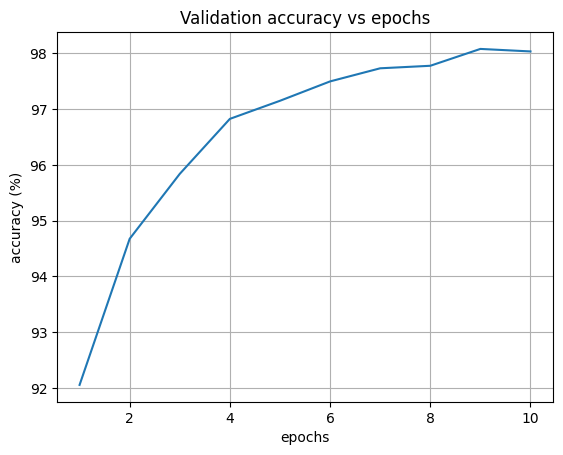

In [ ]:
results_path = '/content/drive/MyDrive/yolov5_vig/classify/train4/results.csv'

results = pd.read_csv(results_path)

# Strip leading/trailing spaces from column names
results.columns = results.columns.str.strip()
plt.figure()
plt.plot(results['epoch'], results['metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()
